# Download Dataset

In [2]:
# Uncomment these to download the dataset
# mkdir("../dataset")
# cd("../dataset") do
#     run(`wget http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip`) 
#     run(`unzip mini_speech_commands.zip`)
# end
using Markdown

Markdown.parse_file("../dataset/mini_speech_commands/README.md")

# Speech Commands dataset excerpt

This is a small excerpt of the [Speech Commands Dataset](https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html) for use in a tutorial on tensorflow.org. Please refer to the original [dataset](http://download.tensorflow.org/data/speech*commands*v0.01.tar.gz](http://download.tensorflow.org/data/speech*commands*v0.01.tar.gz) for documentation and license information."""


In [3]:
# The Evaliable Commands
commands = [c for c=readdir("../dataset/mini_speech_commands") if c!="README.md"]

8-element Vector{String}:
 "down"
 "go"
 "left"
 "no"
 "right"
 "stop"
 "up"
 "yes"

In [4]:
# Gather file pathes
using Glob
using Random
filenames = glob("../dataset/mini_speech_commands/*/*") |> shuffle
num_examples = length(readdir("../dataset/mini_speech_commands/$(commands[1])"))
println("Number of total examples: ",length(filenames))
println("Number of examples per label: ", num_examples)
println("Example File Tensor: ", filenames[1])

Number of total examples: 8000
Number of examples per label: 1000
Example File Tensor: ../dataset/mini_speech_commands/right/bab36420_nohash_3.wav


In [5]:
# Separate the data set in training data, validation data and test data

train_files = filenames[1:6400]
val_files = filenames[6401:7200]
test_files = filenames[7201:8000]

println("Training set size: ", length(train_files))
println("Validation set size: ", length(val_files))
println("Test set size: ", length(test_files))

Training set size: 6400
Validation set size: 800
Test set size: 800


In [6]:
# Check loading WAVs
using WAV
test_audio, fs = wavread("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
@show fs
@show size(test_audio)

fs = 16000.0f0
size(test_audio) = (13654, 1)


(13654, 1)

In [7]:
# Function to load WAVs
function decode_audio(audio_binary)
    audio, fs = wavread(audio_binary)
    audio[:,1]
end
decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")

13654-element Vector{Float64}:
 0.0017700735496078372
 0.002990813928647725
 0.002838221381267739
 0.003021332438123722
 0.0024719992675557726
 0.003143406476027711
 0.0027466658528397473
 0.0019531846064638203
 0.0020142216254158147
 0.0019226660969878231
 0.0018005920590838343
 0.001098666341135899
 0.0018311105685598315
 ⋮
 0.016907254249702446
 0.01913510544145024
 0.020264290292062136
 0.020477919858394117
 0.020020142216254158
 0.020264290292062136
 0.021698660237434005
 0.023102511673329874
 0.025818659016693626
 0.025269325846125675
 0.029725028229621267
 0.017761772515030368

In [8]:
# Function to get command label
function get_label(file_path)
    split(file_path,"/")[end-1] # For Windows System otherwise replace with /
end
get_label(filenames[1])

"right"

In [9]:
# Function to get WAV with Label
get_waveform_and_label(file_path) = begin
   # @show file_path
    decode_audio(file_path), get_label(file_path)
end

get_waveform_and_label(filenames[1])


([-0.00012207403790398877, -0.0015564439832758568, 0.0009155552842799158, 0.0007019257179479354, -3.051850947599719e-5, -0.00024414807580797754, 0.0011902218695638905, 0.001434369945371868, 0.00021362956633198035, 0.000793481246375927  …  -0.001434369945371868, -0.001281777397991882, -0.0009155552842799158, -0.0008850367748039186, -0.000793481246375927, -0.0008545182653279214, -0.0008545182653279214, -0.0008850367748039186, -0.0010376293221839045, -0.0007019257179479354], "right")

In [10]:
#train_ds = [get_waveform_and_label(f) for f=train_files]
# Load some waveforms for checking
waveform_ds = get_waveform_and_label.(val_files)

800-element Vector{Tuple{Vector{Float64}, SubString{String}}}:
 ([-3.051850947599719e-5, -0.0007324442274239326, -0.0018005920590838343, -0.0021668141727958007, -0.0011291848506118961, -0.0017090365306558428, -0.0018616290780358287, -0.0014038514358958708, -0.0023194067201757866, -0.0024414807580797754  …  0.00466933194982757, 0.0038453321939756462, 0.004089480269783624, 0.003509628589739677, 0.0030518509475997192, 0.0028077028717917417, 0.002838221381267739, 0.002380443739127781, 6.103701895199438e-5, 0.0007324442274239326], "up")
 ([0.00024414807580797754, -3.051850947599719e-5, -9.155552842799158e-5, 0.00015259254737998596, -0.00015259254737998596, -0.0003051850947599719, 0.0, 6.103701895199438e-5, -6.103701895199438e-5, 0.00024414807580797754  …  0.014191106906338695, 0.0009765923032319102, -0.005920590838343455, -0.002838221381267739, 0.0057985168004394665, 0.002410962248603778, 0.0007019257179479354, 0.003967406231879635, 0.0029297769096957305, -0.007507553331095309], "right")
 (

In [11]:
using Plots

rows = 3
cols = 3

n = rows*cols

figs = [
    plot(
        (1:length(waveform_ds[i][1]))./1e3, waveform_ds[i][1],
        title = waveform_ds[i][2],
        yticks = -1.2:0.4:1.2,
        label = waveform_ds[i][2],
        ylim = (-1.3,1.3),
        xticks = 0:5:15,
    )
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [12]:
? DSP.stft

UndefVarError: UndefVarError: DSP not defined

In [13]:
# Compute spectragrams (with stft)
# Compared to tf function the spectrogram from DSP.stft is transposed

using DSP

function get_spectrogram(waveform)
    input_len = 16000
    waveform = length(waveform) >= input_len ? 
                    waveform[1:input_len]    :
                    [convert.(Float32,waveform);zeros(Float32,input_len - length(waveform))]
    spectrogram = DSP.stft(
        waveform,
        255,
        255-128, 
        window=hanning,
        fs=fs,
    ) |> x->abs.(x)
    spectrogram
end

get_spectrogram(waveform_ds[1][1])

129×124 Matrix{Float64}:
 0.0765058    0.11512      0.235729     …  0.13045      0.166877
 0.740974     0.72456      0.733018        0.683272     0.700755
 0.449153     0.425897     0.3809          0.334804     0.367755
 0.177266     0.104587     0.0683432       0.038759     0.0725749
 0.144582     0.0821635    0.0396739       0.0650869    0.0631602
 0.0957893    0.111377     0.0629287    …  0.0481916    0.0612993
 0.048593     0.0342387    0.0739411       0.053615     0.080677
 0.0965423    0.0615093    0.0171555       0.0424502    0.0610255
 0.0989268    0.0615331    0.0544289       0.0180726    0.0345454
 0.0849396    0.0471081    0.022775        0.0301031    0.0147689
 0.055456     0.0357511    0.0313218    …  0.013323     0.00971903
 0.0362931    0.0219228    0.0151226       0.021766     0.0178037
 0.0604863    0.0103861    0.0123379       0.0169052    0.0120899
 ⋮                                      ⋱               
 0.000973067  0.0014568    0.00134763      8.77765e-5   0.00146

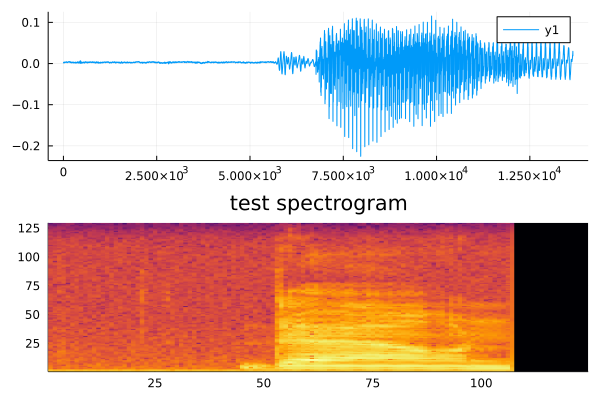

In [14]:
# Function to plot spectrograms
# I was too lazy to fix the xticks of the spectrogram

function plot_spectrogram(spectrogram, title)
    tmp = similar(spectrogram)
    if (length(size(spectrogram))>2)
        @assert length(size(spectrogram)) == 3
        tmp = spectrogram[:,:,1]
    else
        tmp = spectrogram
    end
    log_spec = log.(tmp .+ eps(Float32))
    heatmap(log_spec, legend=false, title=title)
end


tst_waveform = decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
tst_spectrogram = get_spectrogram(tst_waveform)

p1 = plot(tst_waveform)
p2 = plot_spectrogram(tst_spectrogram, "test spectrogram")

plot(p1,p2, layout=(2,1))

size(x) = (129, 124, 1)
commands = ["down", "go", "left", "no", "right", "stop", "up", "yes"]


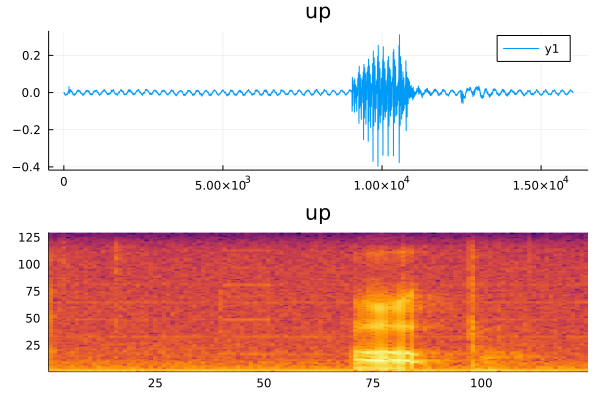

Bool[0, 0, 0, 0, 0, 0, 1, 0]


In [15]:
using Flux

# Function to get spectrogram label pairs
# Deviation from TF - I store labels in onehot format
function get_spectrogram_and_label_id((waveform, label))
    spectrogram = convert.(Float32,get_spectrogram(waveform))
    reshape(spectrogram,size(spectrogram)...,1), Flux.onehot(label,commands)
end

# Check the function
x,y = get_spectrogram_and_label_id((waveform_ds[1][1], waveform_ds[1][2]))
p1 = plot(waveform_ds[1][1][:,:,1,1],title="$(waveform_ds[1][2])")
@show size(x)
p2 = plot_spectrogram(x, "$(waveform_ds[1][2])")
@show commands
plot(p1, p2, layout=(2,1)) |> display
println(y)

In [16]:
spectrogram_ds = get_spectrogram_and_label_id.(waveform_ds)

800-element Vector{Tuple{Array{Float32, 3}, Flux.OneHotArray{UInt32, 8, 0, 1, UInt32}}}:
 ([0.07650585 0.11512028 … 0.13045044 0.16687658; 0.74097365 0.72456026 … 0.68327194 0.7007547; … ; 0.00014129232 3.5826648f-5 … 5.9183167f-5 0.00017749568; 7.9538506f-5 0.000104825966 … 0.00012607324 6.002627f-5;;;], [0, 0, 0, 0, 0, 0, 1, 0])
 ([0.003817718 6.276199f-6 … 0.00346888 0.035451666; 0.001771133 0.010106429 … 0.011384532 0.035472937; … ; 0.00011032897 9.305435f-5 … 0.00029581078 0.00012306469; 0.00016026305 0.00011101011 … 0.00013896296 0.00014858854;;;], [0, 0, 0, 0, 1, 0, 0, 0])
 ([0.016523894 0.017993253 … 0.08626449 0.053314533; 0.17166209 0.13838932 … 0.15207666 0.0864042; … ; 0.00014571124 0.00014471593 … 6.328553f-5 0.00035654506; 0.0002006833 0.0001405056 … 0.00016779096 0.00033548902;;;], [0, 0, 0, 0, 0, 0, 0, 1])
 ([7.285155f-6 1.7585666f-5 … 3.8231785f-5 3.6367157f-7; 3.0326895f-5 3.6005258f-5 … 9.0958216f-5 6.494008f-5; … ; 7.6112505f-5 2.9676441f-5 … 2.5274821f-5 6.296676f-

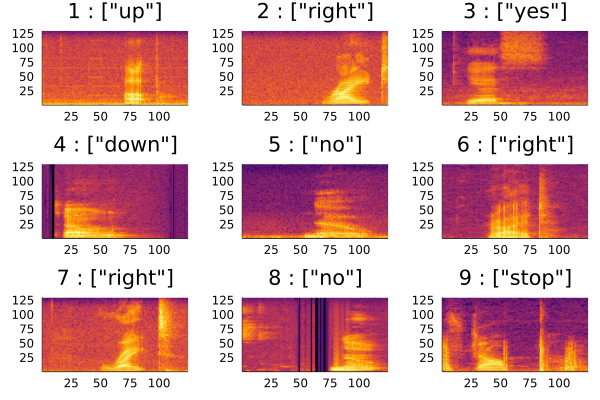

In [17]:
rows = 3
cols = 3
n = rows*cols

figs = [
    plot_spectrogram(spectrogram_ds[i][1][:,:,1,1],"$i : $(commands[spectrogram_ds[i][2]])")
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [ ]:
# wavplay(train_ds[1][1],fs)
# wavplay(train_ds[2][1],fs)
# wavplay(train_ds[5][1],fs)

In [18]:
# Function to prepare all data needed for training, validation and testing
function preprocess_dataset(files)
    files_ds = [get_waveform_and_label(f) for f=files]
    get_spectrogram_and_label_id.(files_ds)
end

preprocess_dataset (generic function with 1 method)

In [19]:
# Prepare Data
train_ds = preprocess_dataset(train_files)
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

800-element Vector{Tuple{Array{Float32, 3}, Flux.OneHotArray{UInt32, 8, 0, 1, UInt32}}}:
 ([0.05442455 0.09063767 … 0.034314282 0.08829181; 0.15925136 0.08784471 … 0.045182124 0.060620066; … ; 7.864744f-5 7.104129f-5 … 0.0009805736 0.0010789996; 0.00013265993 5.2042953f-5 … 0.0010758109 0.00025183137;;;], [0, 0, 0, 0, 0, 0, 0, 1])
 ([9.4036106f-5 7.952735f-5 … 0.0010981066 0.00047255485; 0.0009922293 0.00072687404 … 0.0010075958 0.00078475336; … ; 8.052423f-5 6.593971f-5 … 0.0001568275 0.00012963112; 3.8847065f-5 1.9142903f-5 … 0.00016485709 8.745715f-5;;;], [0, 0, 1, 0, 0, 0, 0, 0])
 ([0.00092643354 0.00024114808 … 0.00031096887 0.0; 0.0032420985 0.00068636547 … 0.0006043177 0.0; … ; 3.457339f-5 5.4869633f-5 … 1.3859967f-5 0.0; 1.6695994f-5 7.6565215f-5 … 1.44538935f-5 0.0;;;], [1, 0, 0, 0, 0, 0, 0, 0])
 ([0.028923478 0.025693461 … 0.5603721 0.019418221; 0.04276949 0.030427597 … 3.4790776 2.8648112; … ; 0.0009320731 0.001028959 … 0.00049859413 0.00024938345; 0.0027544776 0.001658646 …

In [20]:
train_ds_x = Flux.batch([d[1] for d=train_ds[1:3200]]) # I have to convert train_ds in two parts otherwise I get stackoverflow
train_ds_x = cat(train_ds_x,Flux.batch([d[1] for d=train_ds[3201:end]]),dims=4) # Flux.batch([d[1] for d=train_ds[1:3200]])
train_ds_y = Flux.batch([d[2] for d=train_ds])
val_ds_x = Flux.batch([d[1] for d=val_ds])
val_ds_y = Flux.batch([d[2] for d=val_ds])

8×800 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  1     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  1
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅

In [21]:
# Finally use the DataLoader

trainingData = Flux.DataLoader((train_ds_x, train_ds_y), batchsize=64,shuffle=true)
valData = Flux.DataLoader((val_ds_x, val_ds_y), batchsize=64)

MLUtils.DataLoader{Tuple{Array{Float32, 4}, Flux.OneHotArray{UInt32, 8, 1, 2, Vector{UInt32}}}, Random._GLOBAL_RNG}(([0.07650585 0.11512028 … 0.13045044 0.16687658; 0.74097365 0.72456026 … 0.68327194 0.7007547; … ; 0.00014129232 3.5826648f-5 … 5.9183167f-5 0.00017749568; 7.9538506f-5 0.000104825966 … 0.00012607324 6.002627f-5;;;; 0.003817718 6.276199f-6 … 0.00346888 0.035451666; 0.001771133 0.010106429 … 0.011384532 0.035472937; … ; 0.00011032897 9.305435f-5 … 0.00029581078 0.00012306469; 0.00016026305 0.00011101011 … 0.00013896296 0.00014858854;;;; 0.016523894 0.017993253 … 0.08626449 0.053314533; 0.17166209 0.13838932 … 0.15207666 0.0864042; … ; 0.00014571124 0.00014471593 … 6.328553f-5 0.00035654506; 0.0002006833 0.0001405056 … 0.00016779096 0.00033548902;;;; … ;;;; 0.1809202 0.15762033 … 0.10053196 0.119740985; 0.26173764 0.2293118 … 0.26242045 0.27387345; … ; 2.7510285f-5 0.00012296057 … 0.00012406062 3.0387328f-5; 1.939303f-5 0.000108259046 … 3.331737f-5 4.1531322f-5;;;; 0.018854

size(val_ds_y) = (8, 800)


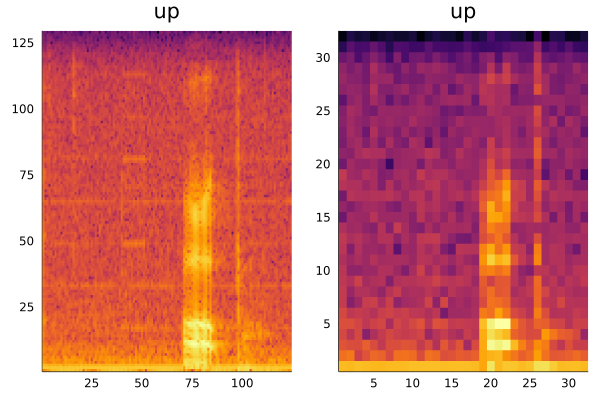

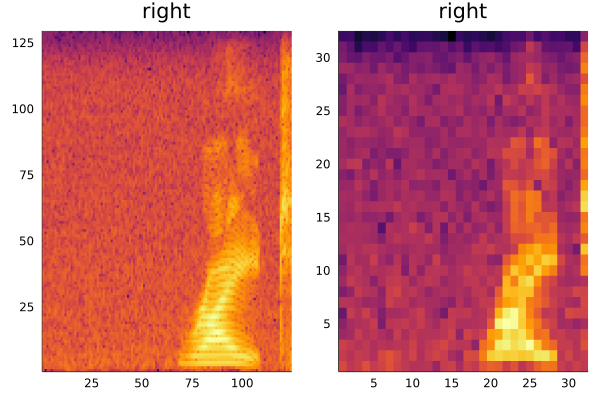

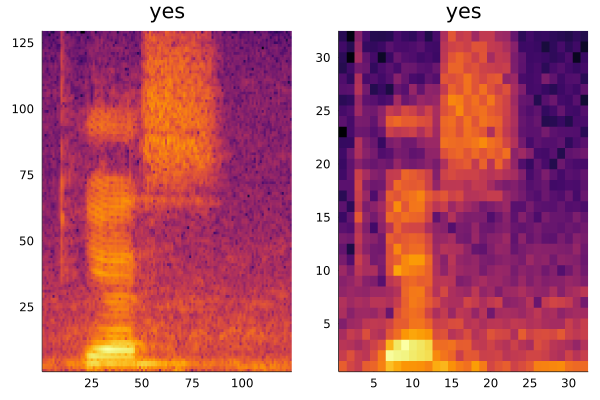

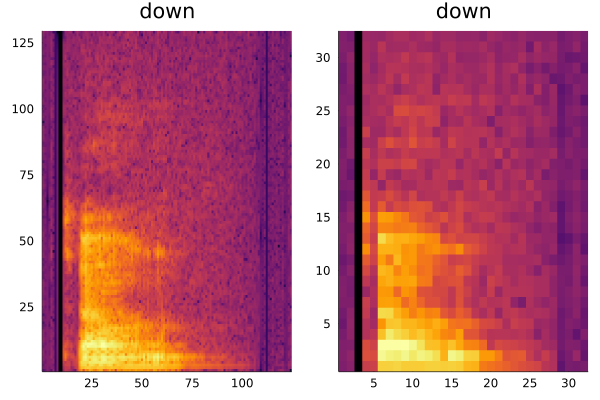

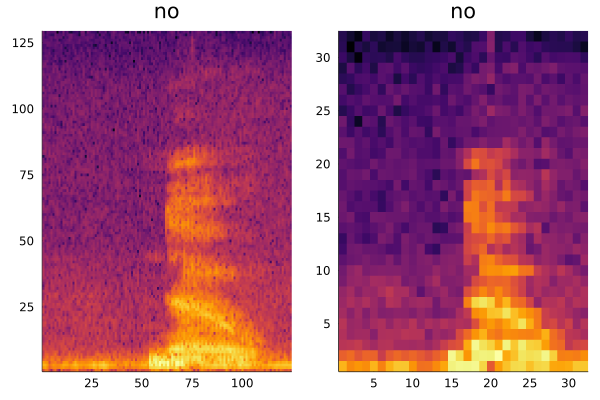

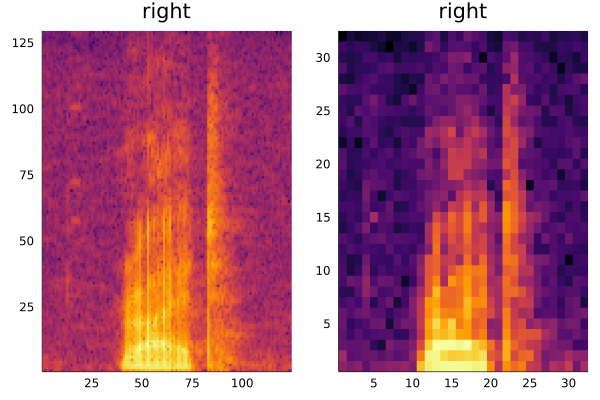

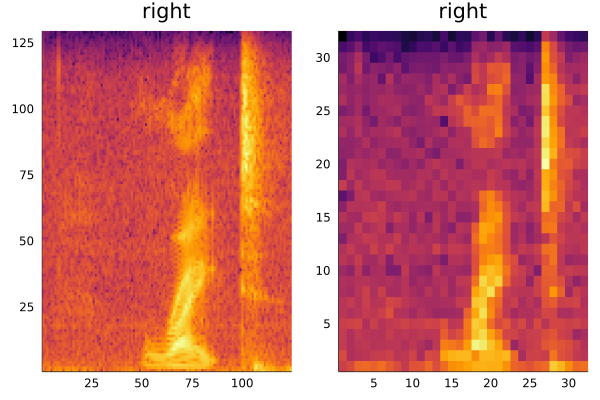

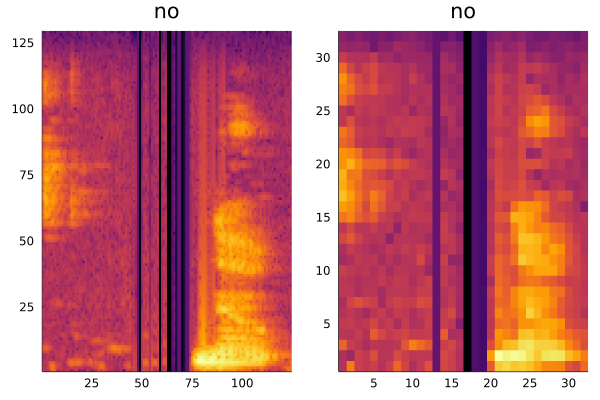

size(resizing(val_ds_x[:, :, :, 1:1])) = (32, 32, 1, 1)


(32, 32, 1, 1)

In [45]:
function resizing(x) # Replacement for TFs resizing layer
    # Target dimensions are (32,32) so scale up by factor 32,32 and then downsample
    x_up = upsample_bilinear(x, (32,32))
    x_up[33:129:129*32,33:124:124*32,:,:]
end

@show size(val_ds_y)

orig_figs = [
    plot_spectrogram(val_ds_x[:,:,1,i],"$(commands[Flux.onecold(val_ds_y[:,i])])")
    for i=1:8
]

ds_figs = [
    plot_spectrogram(resizing(val_ds_x[:,:,:,i:i])[:,:,:,1],"$(commands[Flux.onecold(val_ds_y[:,i])])")
    for i=1:8
]

for i=1:8
    plot(orig_figs[i], ds_figs[i],layout=(1,2)) |> display
end

@show size(resizing(val_ds_x[:,:,:,1:1]))

In [48]:
# Model Definition

model = Chain(
    resizing,
    Flux.normalize,  # Here tf normalize layer is used
    Conv((3,3),1=>32, Flux.relu),
    Conv((3,3),32=>64, Flux.relu),
    MaxPool((2,2)),
    Dropout(0.25),
    Flux.flatten,
    Dense(12544=>128,relu),
    Dropout(0.5),
    Dense(128=>length(commands)),
)
# Checking 
@show size(train_ds[1][1])
model(reshape(train_ds[1][1],size(train_ds[1][1])...,1))

size((train_ds[1])[1]) = (129, 124, 1)


8×1 Matrix{Float32}:
  0.0039180606
  0.00793762
 -0.00440007
  0.00041542493
  0.0034542533
 -0.0032993606
 -0.010344934
  0.0031944946

In [49]:
# Loss Function
function loss(x,y)
    ŷ = model(x)
    Flux.Losses.logitcrossentropy(ŷ,y)
end

# Check Accuracy
function getAccuracy(m,d)
    acc = 0
    for (x,y)=d
        ŷ = model(x)
        acc += sum(Flux.onecold(ŷ) .== Flux.onecold(y)) / size(x,2)
    end
    acc/length(d)
end

# Total Loss
function loss_tot(d)
    l = 0
    for (x,y) = d
        l+= loss(x,y)
    end
    return l/length(d)
end

loss_tot (generic function with 1 method)

In [51]:
# Goes very slow :''(
@show loss_tot(valData) 
@show getAccuracy(model,valData)

loss_tot(valData) = 2.0794473f0
getAccuracy(model, valData) = 0.05955334987593052


0.05955334987593052

In [ ]:
# Does not Learn
opt = Flux.Optimise.ADAM(3e-3)
ps = Flux.params(model)
testmode!(model,false)

evalcb() = println("Loss: $(loss_tot(valData))")

Flux.@epochs 10 Flux.train!(
    loss,
    ps,
    trainingData,
    opt,
    cb=Flux.throttle(evalcb,10),
)


┌ Info: Epoch 1
└ @ Main /imec/users/detter55/.julia/packages/Flux/js6mP/src/optimise/train.jl:154


Loss: 2.0820065
Loss: 2.0889306
Loss: 2.082158
Loss: 2.0821059
Loss: 2.080793
Loss: 2.080502
